In [ ]:
!pip install scikit-plot

In [1]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 2.4 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ML baylor/survey lung cancer.csv")
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

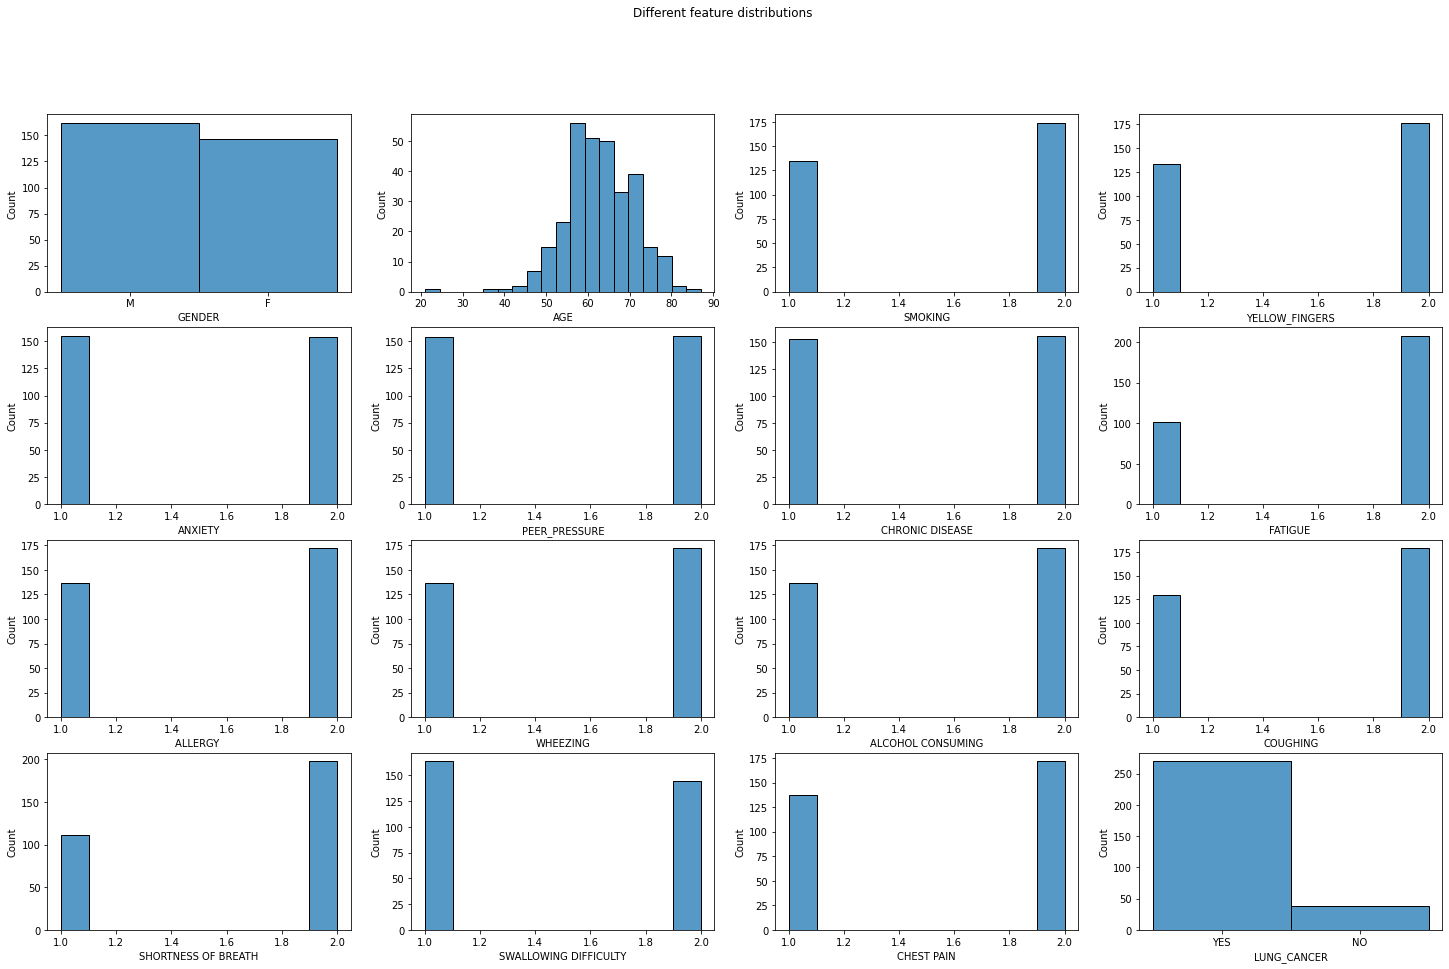

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(25, 15))
fig.suptitle('Different feature distributions')

axes = axes.reshape(16,)

for i,column in enumerate(df.columns):
    sns.histplot(ax = axes[i],data = df, x= column)

In [ ]:
print(df.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [ ]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
df.shape

(309, 16)

In [ ]:
df.size

4944

In [ ]:
gender = {'M': 1,'F': 2}

df.GENDER = [gender[item] for item in df.GENDER]

In [ ]:
df.head

<bound method NDFrame.head of      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         2   59        1               1        1              2   
3         1   63        2               2        2              1   
4         2   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       2   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  

In [ ]:
lung_cancer = {'YES': 1,'NO': 0}

df.LUNG_CANCER = [lung_cancer[item] for item in df.LUNG_CANCER]

In [ ]:
df.head

<bound method NDFrame.head of      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         2   59        1               1        1              2   
3         1   63        2               2        2              1   
4         2   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       2   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [ ]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,1.475728,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,2.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.duplicated().sum()

33

no null values

In [ ]:
df.skew()

GENDER                   0.097677
AGE                     -0.395086
SMOKING                 -0.255705
YELLOW_FINGERS          -0.282425
ANXIETY                  0.006504
PEER_PRESSURE           -0.006504
CHRONIC DISEASE         -0.019513
FATIGUE                 -0.741836
ALLERGY                 -0.229118
WHEEZING                -0.229118
ALCOHOL CONSUMING       -0.229118
COUGHING                -0.322786
SHORTNESS OF BREATH     -0.589714
SWALLOWING DIFFICULTY    0.123812
CHEST PAIN              -0.229118
LUNG_CANCER             -2.262112
dtype: float64

skewness: asymmetry of the probability distribution of a real-valued random variable about its mean. Here all of them is negative skew that indicates that the tail is on the left side of the distribution,

In [ ]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


Heatmap

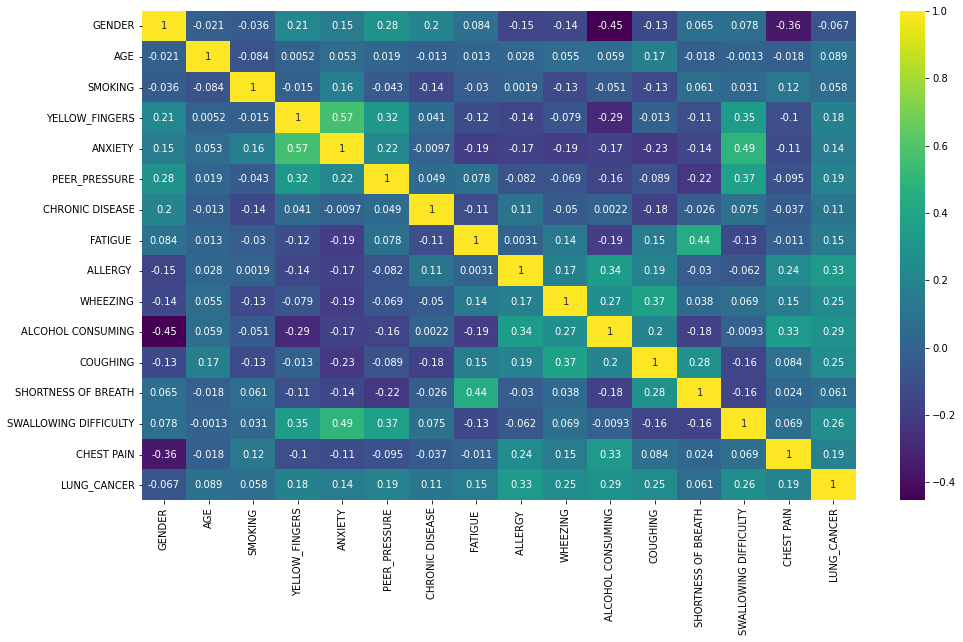

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

In [ ]:
numerical = ['AGE']

categorical = ['GENDER','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

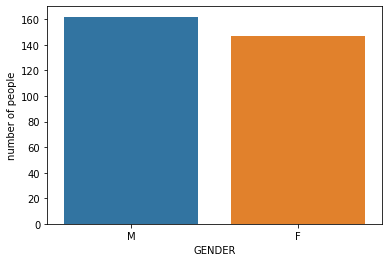

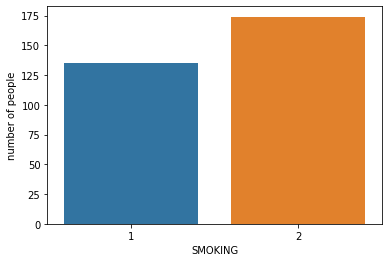

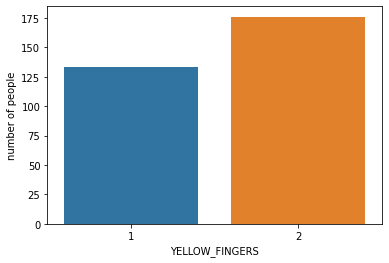

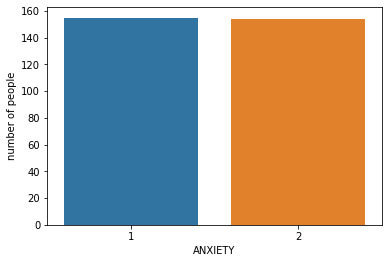

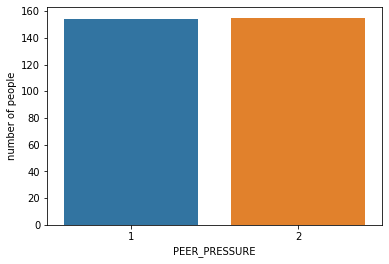

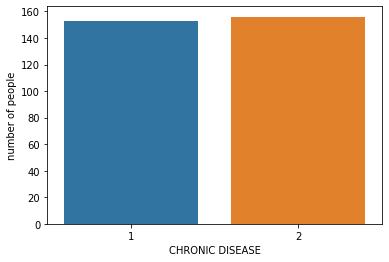

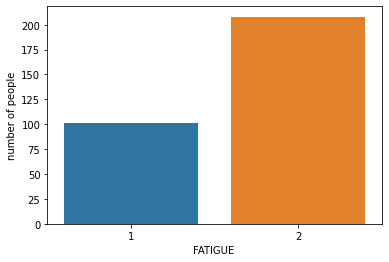

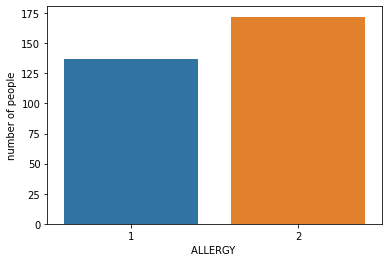

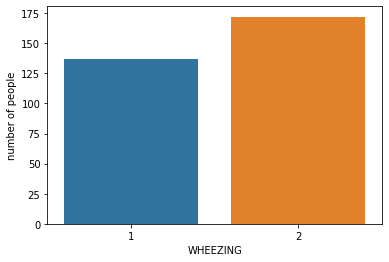

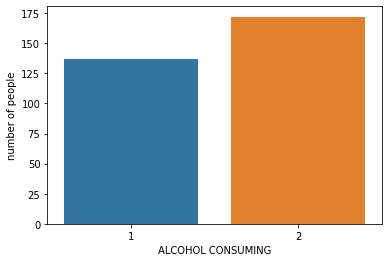

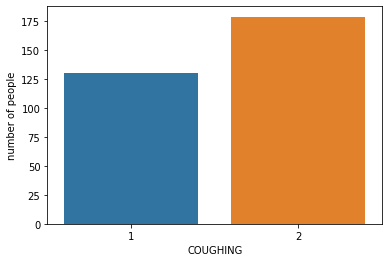

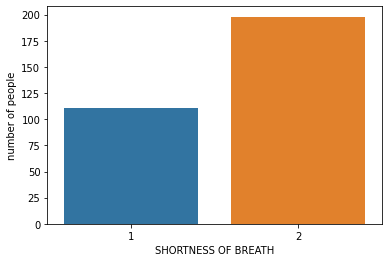

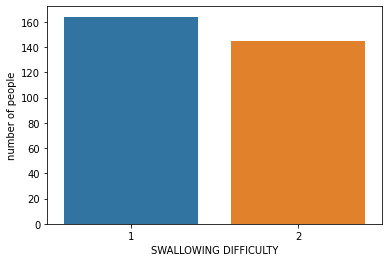

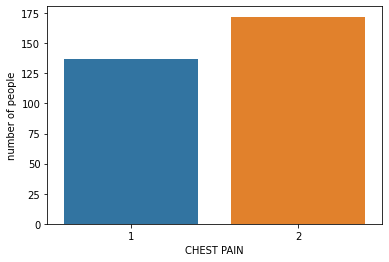

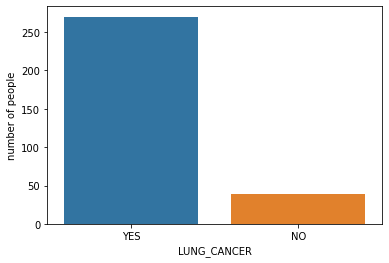

In [ ]:
for i in df[categorical].columns:
    sns.barplot(x=df[categorical][i].value_counts().index,y=df[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

Choughing, wheezing, chest pain, allergy, and yellow fingers seem to occur more in presence of lung cancer, and less in absence of it. Therfore, these symptoms can be considered to act as reliable indicators of presence of lung cancer.
Fatigue and shortness of breath, though are equally likely to occur in absence of lung cancer, are about twice more likely to occur in presence of lung cancer. These two, therefore can be considered the additional indicators of lung cancer.
Although, swallowing difficulty is less likely to occur in absence of lung cancer, it is equally likely to occur in presence of lung cancer. Therefore, swallowing difficulty can not be considered a reliable indicator of lung cancer.

The presence of anxiety and chronic disease seems to be slightly positively correlated with the presence of lung cancer. Since chronic disease is a physiological comorbidity, it may be considered as secondary symptom to predict lung cancer

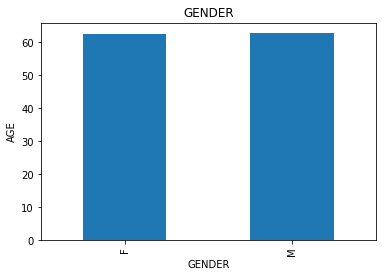

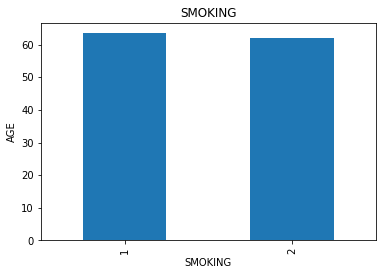

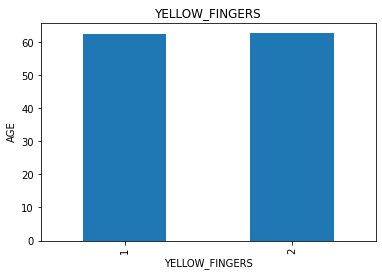

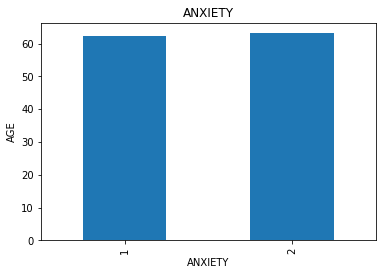

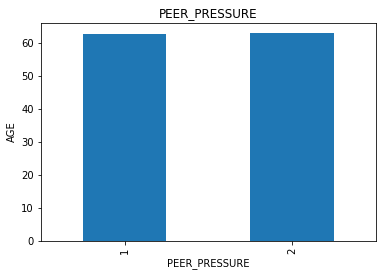

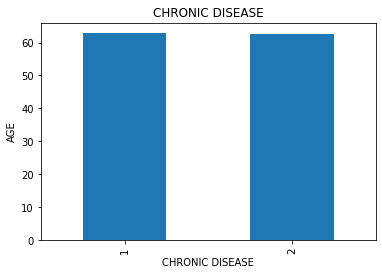

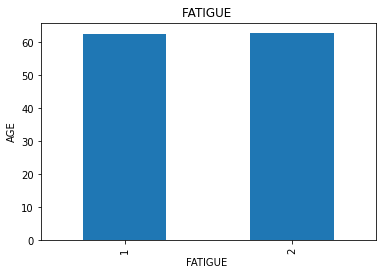

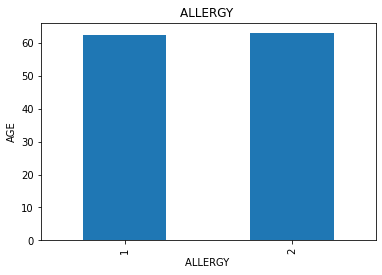

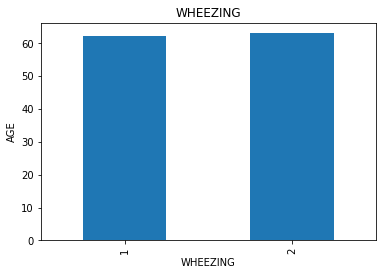

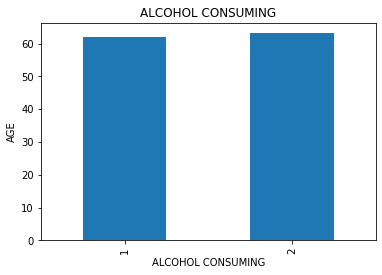

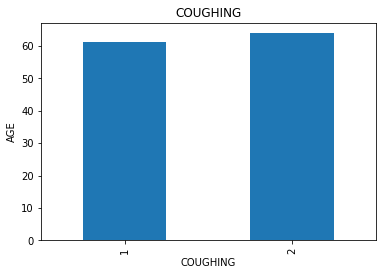

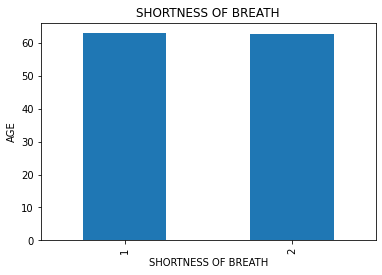

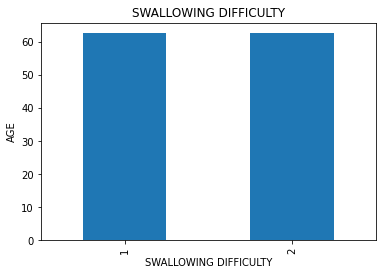

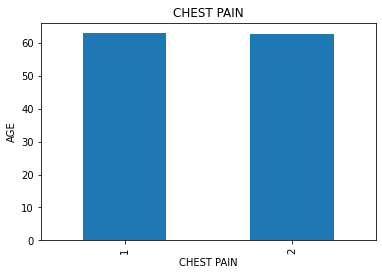

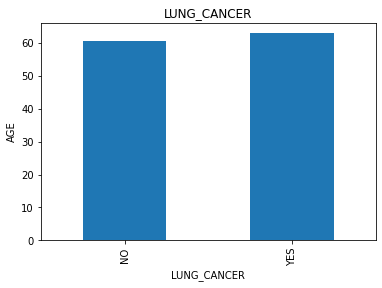

In [ ]:
for i in df[categorical].columns:
    data=df.copy()
    data.groupby(i)['AGE'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('AGE')
    plt.title(i)
    plt.show()

Age has no corelation or anything varying with all other columns

In [ ]:
df.rename(columns = {'GENDER' : 'GENDER', 'AGE' : 'AGE', 'SMOKING' : 'SMOKING', 'YELLOW_FINGERS' : 'YELLOW_FINGERS', 'ANXIETY' : 'ANXIETY',
       'PEER_PRESSURE' : 'PEER_PRESSURE', 'CHRONIC DISEASE' : 'CHRONIC DISEASE', 'FATIGUE ' : 'FATIGUE', 'ALLERGY ' : 'ALLERGY', 'WHEEZING' : 'WHEEZING',
       'ALCOHOL CONSUMING' : 'ALCOHOL CONSUMING', 'COUGHING' : 'COUGHING', 'SHORTNESS OF BREATH' : 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY' : 'SWALLOWING DIFFICULTY', 'CHEST PAIN' : 'CHEST PAIN', 'LUNG_CANCER': 'LUNG_CANCER'}, inplace = True)

In [ ]:
df1=pd.get_dummies(data=df,columns=['LUNG_CANCER'],drop_first=True)
df1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [ ]:
df1 = df.groupby('AGE').agg({ 'GENDER' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE' : 'sum', 'ALLERGY' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER' : 'sum'})
df1

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
AGE,,,,,,,,,,,,,,,
21,1,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
38,1,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
39,1,2,1,1,2,1,2,2,2,2,1,2,1,2,YES
44,2,3,4,3,4,4,4,2,3,2,2,4,4,3,YESYES
46,1,1,2,2,1,1,1,1,1,1,1,1,2,2,NO
47,4,7,8,4,7,8,7,6,7,4,6,7,5,6,YESYESNOYES
48,2,3,3,3,3,4,4,4,3,3,4,4,4,3,YESYES
49,3,4,4,4,5,5,4,5,4,5,6,5,4,4,YESYESYES
51,8,14,15,13,13,11,15,12,11,11,11,15,12,11,YESYESYESYESYESYESYESYES


In [ ]:
df2 = df.groupby('GENDER').agg({ 'AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE' : 'sum', 'ALLERGY' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER' : 'sum'})
df2

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,,,,,,,,,,,,,,,
F,147,227,247,232,242,237,252,217,218,194,222,246,222,201,NONOYESYESNOYESNOYESYESNOYESYESNOYESYESNOYESYE...
M,162,256,238,231,222,228,265,264,263,287,266,261,232,280,YESYESNOYESYESYESYESNOYESYESYESYESYESNONOYESNO...


from this we can say that
males are morethan females, mean age of males is 0.4 than females
males smoke morethan females
yellow fingers are more for females
anxiety is also more for females(only one difference)
peer presure is also more for females
chronic disease is also for for females
fatigue is more for males
allergy is more for males
wheezing is more for males
males consume for alocohol than females
males cough for than femlaes
shortness of breath is more for males
swallowing diffculty is more for females
chest pain is more for females
Most of the males having lung cancer


In [ ]:
df=pd.get_dummies(data=df,columns=['GENDER'],drop_first=True)
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1


In [ ]:
df3 = df.groupby('SMOKING').agg({ 'GENDER' : 'sum','AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE' : 'sum', 'ALLERGY' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER' : 'sum'})
df3

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
SMOKING,,,,,,,,,,,,,,,,
1,MFFFMFFFMMMMMFMFFMFFMFMMMFMFMFMFFFMMMMFFFMMFFF...,135,135,213,190,206,214,228,210,220,214,223,217,196,201,YESNONOYESYESYESNOYESYESNONONOYESNOYESYESYESNO...
2,MMMFFMFFMMMMFFFMMFFFMMFFMMMMFMMFMFMMFMFFMFFMMM...,174,348,272,273,258,251,289,271,261,267,265,290,258,280,YESNOYESYESNOYESYESNOYESNOYESYESYESYESNOYESYES...


In [ ]:
lung_cancer = {'YES': 1,'NO': 0}

df.LUNG_CANCER = [lung_cancer[item] for item in df.LUNG_CANCER]

In [ ]:
df3 = df.groupby('SMOKING').agg({ 'LUNG_CANCER' : 'sum'})
df3

,LUNG_CANCER
SMOKING,
1,115
2,155


smoking people have high problems and people who smoke got cancer more

In [ ]:
df4 = df.groupby('YELLOW_FINGERS').agg({ 'GENDER_M' : 'sum','AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE' : 'sum', 'ALLERGY' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER' : 'sum'})
df4

,GENDER_M,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,,,,,,,,,,,,,,,,
1,86,133,209,133,156,175,197,231,218,213,229,211,226,169,215,YESNOYESNOYESNOYESNOYESNONOYESNOYESNOYESYESYES...
2,76,176,274,352,307,289,268,286,263,268,252,277,281,285,266,YESNONOYESYESYESYESYESYESYESYESYESYESYESYESYES...


In [ ]:
df4 = df.groupby('YELLOW_FINGERS').agg({ 'LUNG_CANCER' : 'sum'})
df4

,LUNG_CANCER
YELLOW_FINGERS,
1,107
2,163


mostly females have yellow fingers so any person with yellow fingers have high probability of getting lung cancer

In [ ]:
df5 = df.groupby('ANXIETY').agg({ 'GENDER_M' : 'sum','AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE' : 'sum', 'ALLERGY' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER' : 'sum'})
df5

,GENDER_M,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
ANXIETY,,,,,,,,,,,,,,,,
1,93,155,230,200,155,216,234,273,254,256,254,262,265,190,250,YESNONOYESYESYESNOYESNOYESNONOYESNONONOYESNOYE...
2,69,154,253,285,308,248,231,244,227,225,227,226,242,264,231,YESNOYESNOYESYESYESYESYESYESYESYESYESYESYESYES...


In [ ]:
df6 = df.groupby('ALCOHOL CONSUMING').agg({ 'GENDER' : 'sum','AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE' : 'sum', 'ALLERGY' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER' : 'sum'})
df6

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
ALCOHOL CONSUMING,,,,,,,,,,,,,,,,
1,MFFFFFFFFFFFFFMFMFMFMFMMMFMFFFFFFFFFFFMFMMFFFF...,137,218,237,218,218,206,243,187,193,137,201,238,202,188,YESNONOYESYESNOYESNOYESYESNOYESYESNONONONOYESN...
2,MMMMMMMMMMMMFFMMMMMFMFMFFMFFMFMMMMMFMMMMMMMMFF...,172,265,248,245,246,259,274,294,288,344,287,269,252,293,YESNOYESYESYESYESNOYESYESYESYESYESYESYESNOYESY...


mostly males are less anxiety
people with less anxiety are less smoking, having less yellow_fingers,less peer pressure less swallowing dificulity and less chance to get cancer

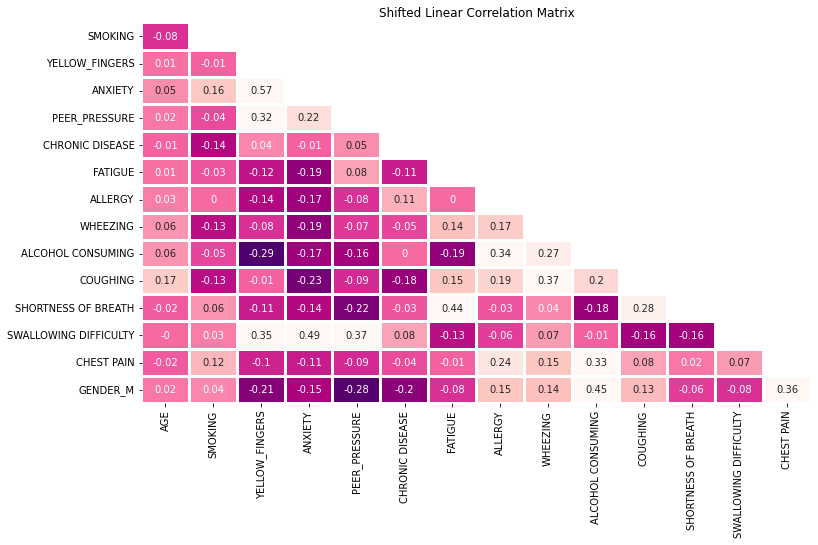

In [ ]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

Feature Scaling

In [ ]:
#remove target variable from categorical array
categorical.remove('LUNG_CANCER')

#change dtype of categorical features to object
df[categorical]=df[categorical].astype('object')

#copy of variables and target
X = df.copy()
y = X.pop('LUNG_CANCER')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHRONIC DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS OF BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST PAIN             309 non-null    object
dtypes: int64(1), object(14)

In [ ]:
X_mi = X.copy()

In [ ]:
#label encoding for categorical variables
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

X_mi['AGE']=X_mi['AGE'].astype('float64')

#all discrete features have int dtypes
discrete_features = X_mi.dtypes == int

In [ ]:
discrete_features

GENDER                    True
AGE                      False
SMOKING                   True
YELLOW_FINGERS            True
ANXIETY                   True
PEER_PRESSURE             True
CHRONIC DISEASE           True
FATIGUE                   True
ALLERGY                   True
WHEEZING                  True
ALCOHOL CONSUMING         True
COUGHING                  True
SHORTNESS OF BREATH       True
SWALLOWING DIFFICULTY     True
CHEST PAIN                True
dtype: bool

In [ ]:
#use classification since the target variable is discrete
from sklearn.feature_selection import mutual_info_classif

#define a function to produce mutual information scores
def make_mi_scores(X_mi, y, discrete_features):
    mi_scores = mutual_info_classif(X_mi, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#compute mutual information scores
mi_scores = make_mi_scores(X_mi, y, discrete_features)
mi_scores

ALLERGY                  0.057504
ALCOHOL CONSUMING        0.043414
SWALLOWING DIFFICULTY    0.037858
WHEEZING                 0.031806
COUGHING                 0.031021
AGE                      0.021393
CHEST PAIN               0.018221
PEER_PRESSURE            0.018029
YELLOW_FINGERS           0.016365
ANXIETY                  0.010750
FATIGUE                  0.010725
CHRONIC DISEASE          0.006217
GENDER                   0.002261
SHORTNESS OF BREATH      0.001804
SMOKING                  0.001680
Name: MI Scores, dtype: float64

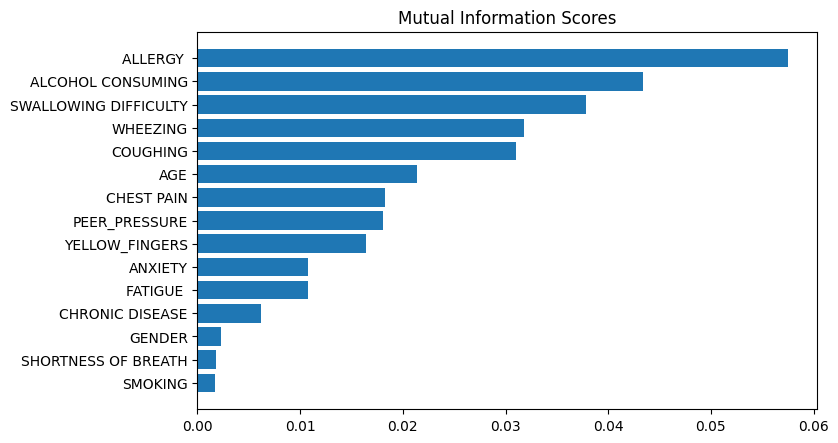

In [ ]:
#define a function to plot mutual information scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

#plot the scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#get feature names
X = pd.concat([X[numerical],pd.get_dummies(X[categorical])],axis=1)
feature_names = X.columns

# train/test split with stratify making sure classes are evenlly represented across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=1)

In [ ]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 AGE                        21
GENDER_1                    0
GENDER_2                    0
SMOKING_1                   0
SMOKING_2                   0
YELLOW_FINGERS_1            0
YELLOW_FINGERS_2            0
ANXIETY_1                   0
ANXIETY_2                   0
PEER_PRESSURE_1             0
PEER_PRESSURE_2             0
CHRONIC DISEASE_1           0
CHRONIC DISEASE_2           0
FATIGUE _1                  0
FATIGUE _2                  0
ALLERGY _1                  0
ALLERGY _2                  0
WHEEZING_1                  0
WHEEZING_2                  0
ALCOHOL CONSUMING_1         0
ALCOHOL CONSUMING_2         0
COUGHING_1                  0
COUGHING_2                  0
SHORTNESS OF BREATH_1       0
SHORTNESS OF BREATH_2       0
SWALLOWING DIFFICULTY_1     0
SWALLOWING DIFFICULTY_2     0
CHEST PAIN_1                0
CHEST PAIN_2                0
dtype: int64
per-feature maximum before scaling:
 AGE                        87
GENDER_1     

In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


without using scalling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.87


with min-max scaling

In [ ]:
#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.85


with standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#instead of using .fit() and .transform() separately, we can use .fit_transform()
X_scaled_d = scaler.fit_transform(X_train)

In [ ]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_s = scaler.transform(X_train)
X_test_scaled_s = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled_s, y_train)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled_s, y_test)))

KNN test accuracy: 0.85


using dimention reduction with scaling

In [ ]:
X_new = pd.DataFrame(X_train_scaled, columns=X.columns)

In [ ]:
from sklearn.decomposition import PCA
skpca = PCA(n_components=2)
X_pca = skpca.fit_transform(X_new)

In [ ]:
# learning an SVM on the scaled training data
knn.fit(X_pca, y_train)

X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

KNN test accuracy: 0.86


using dimention reduction without scaling

In [ ]:
X_new_1 = pd.DataFrame(X_train, columns=X.columns)
X_pca_1 = skpca.fit_transform(X_new_1)

# learning an SVM on the scaled training data
knn.fit(X_pca_1, y_train)

X_test_new_1 = pd.DataFrame(X_test, columns=X.columns)
X_test_pca_1 = skpca.transform(X_test_new_1)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_pca_1, y_test)))

KNN test accuracy: 0.86


Using Algorithm

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import scikitplot as skplt

In [ ]:
# Logistic regression
from sklearn.metrics import classification_report,  accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_pca, y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.10      0.50      0.17         2
           1       0.99      0.88      0.93        76

    accuracy                           0.87        78
   macro avg       0.54      0.69      0.55        78
weighted avg       0.96      0.87      0.91        78

0.8717948717948718


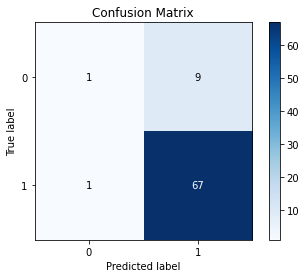

In [ ]:
y_pred1 = model1.predict(X_test_pca)
print(classification_report(y_pred1, y_test))
print(accuracy_score(y_test,y_pred1))
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=False)
plt.show()

In [ ]:
print("Intercept :",model1.intercept_)
print('Slope :',model1.coef_)

Intercept : [2.60225466]
Slope : [[-0.22784658  1.39923513]]


AUC: 0.5103


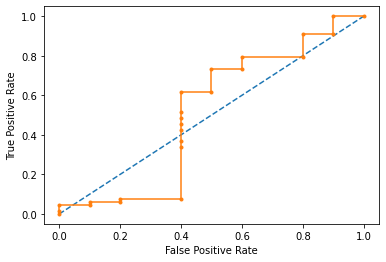

In [ ]:
# roc for logistic regression 
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = model1.predict_proba(X_test_pca)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr2, tpr2, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr2, tpr2, marker='.')
# show the plot
pyplot.show()

When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


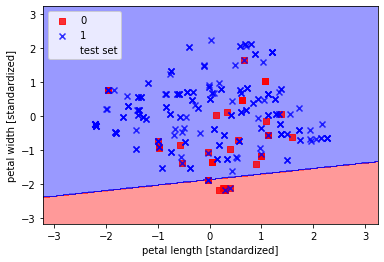

In [ ]:
# Decision region drawing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier=model1,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

without scaling and reduction

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.94      0.91      0.93        70

    accuracy                           0.87        78
   macro avg       0.67      0.71      0.69        78
weighted avg       0.89      0.87      0.88        78

0.8717948717948718


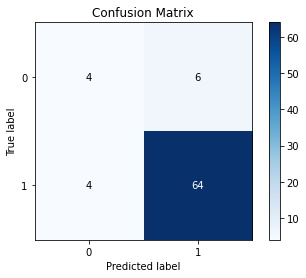

In [ ]:
model2=LogisticRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print(classification_report(y_pred2, y_test))
print(accuracy_score(y_test,y_pred2))
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=False)
plt.show()

In [ ]:
print("Intercept :",model2.intercept_)
print('Slope :',model2.coef_)

Intercept : [1.02317982]
Slope : [[ 0.03493867 -0.0576498   0.05752762 -0.43476156  0.43463938 -0.63228964
   0.63216747 -0.55287439  0.55275221 -0.74105141  0.74092924 -0.68216256
   0.68204038 -0.73593646  0.73581428 -0.78709682  0.78697464 -0.57482337
   0.57470119 -0.71088443  0.71076225 -0.81856078  0.81843861 -0.31106819
   0.31094602 -0.95109455  0.95097237 -0.50691857  0.50679639]]


AUC: 0.8824


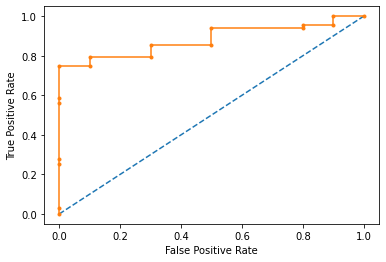

In [ ]:
# roc for logistic regression 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr2, tpr2, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr2, tpr2, marker='.')
# show the plot
pyplot.show()